# Are Those Transactions Fraud?
* Submit Binary-target 'isFraud'

## Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from pandas_profiling import ProfileReport

In [9]:
base_path = '../data/ieee-fraud-detection/'

train_id = pd.read_csv(base_path + 'train_identity.csv')
train_trsc = pd.read_csv(base_path + 'train_transaction.csv')

display(train_id)
display(train_trsc)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial EDA

In [10]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [37]:
# cnt = 0
for col in train_id.columns:
    print(col)
    # cnt += 1
# print(cnt)

TransactionID
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
41


* ***{train, test}_identity.csv files are collected by Vesta's fraud protection system and Digital partners***

* Columns of train_id: Network connection Information *[IP, ISP, Proxy, Etc.]* and Digital signature *[UA: UserAgent, Browser, OS, Version, Etc.]* associated with Transactions.
    * TransactionID
    * id_01 - 38
    * DeviceType
    * DeviceInfo
* *[Categorical Features]*
    * id_12 - id_38
    * DeviceType
    * DeviceInfo

### train_transaction.csv

In [12]:
train_trsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [39]:
for col in train_trsc.columns:
    print(col)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

* Columns of train_trsc
    * TransactionID
    * isFraud
    * TransactionDT: Timedelta from a given reference datetime (Not an actual timestamp)
    * TransactionAmt: 'Transacntion' payment amount in USD
    * ProductCD: Product code, The product for each Transaction
    * card1 - 6: Payment card information such as *[Card type, Card category, Issue bank, Country, Etc.]*
    * addr1 - 2: '1' is Region, '2' is Country
    * dist1 - 2
    * P_emaildomain: Purchaser's email domain
    * R_emaildomain: Recipient's email domain
    * C1 - 14: Counting, such as *[How many addresses are found to be associated with the payment card, Etc.]*
    * D1 - 15: Timedelta, such as *[Days between previous transaction, Etc.]*
    * M1 - 9: Match, such as *[Names on card and address, Etc.]*
    * V1 - 339: Vesta engineered rich features, including *[Ranking, Counting, and other Entity relations]*
* *[Categorical Features]*
    * ProductCD
    * card1 - card6
    * addr1 - 2
    * P_emaildomain
    * R_emaildomain
    * M1 - M9

In [14]:
train_trsc.isFraud.unique() # Binaries

array([0, 1])

### Make Fraud Transaction Only Dataset

In [41]:
pd.set_option('display.max_columns', 999)

In [42]:
inner = pd.merge(train_trsc, train_id, how='inner', on='TransactionID')
inner

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70787.0,Na

In [43]:
frauds = inner[inner.isFraud == 1].reset_index(drop=True)
frauds

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,45.041664,0.041666,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,169947.0,0.0,0.0,3.0,0.0,NaN,NaN,0.0,0.0,100.000000,NotFound,NaN,NaN,Found,Found,225.0,NaN,266.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 54.0 for andr

In [50]:
print('Rate of Fraud Transactions between Total Transactions: %.2f percent.' % (len(frauds) / len(train_trsc) * 100))

Rate of Fraud Transactions between Total Transactions: 1.92 percent.


### Analyzing Fraud Transaction's Device Information

In [51]:
frauds_dev_info = frauds.DeviceInfo.dropna()
frauds_dev_info

0            Redmi Note 4 Build/MMB29M
1            Redmi Note 4 Build/MMB29M
2            Redmi Note 4 Build/MMB29M
4                              rv:52.0
6                              Windows
                     ...              
11313            SM-G610F Build/NRD90M
11314            SM-G610F Build/NRD90M
11315    SAMSUNG SM-J700M Build/MMB29K
11316                       iOS Device
11317              A574BL Build/NMF26F
Name: DeviceInfo, Length: 8607, dtype: object

In [52]:
frauds_dev_info.value_counts()

Windows                          3121
iOS Device                       1240
MacOS                             278
hi6210sft Build/MRA58K            180
SM-A300H Build/LRX22G             169
                                 ... 
SAMSUNG SM-G925P Build/MMB29K       1
SAMSUNG SM-G935A Build/NRD90M       1
MotoG3 Build/MPI24.65-33.1-2        1
rv:61.0                             1
SM-G928F                            1
Name: DeviceInfo, Length: 420, dtype: int64

#### Make New Platform-category of Fraud Transaction's Devices

In [53]:
def get_frauds_dev_plfm(origin):
    platform_cat = ['MS', 'Apple', 'Samsung', 'Chinese', 'Others']
    platform_dict = {
        'MS': 0, 
        'Apple': 0, 
        'Samsung': 0, 
        'Chinese': 0, 
        'Others': 0
    }
    cnt = 0
    dropped = origin.copy(deep=True)

    # Main Processing loop
    for dev_info in origin.values:
        is_processed = 0
        if type(dev_info) == str: # Prevent Type error by Numerical values
            # Handling Normal Infos
            for platform in platform_cat:
                if platform in dev_info:
                    platform_dict[platform] += 1
                    dropped = dropped[dropped != dev_info]
                    cnt += 1
                    is_processed = 1
                    break

            # Handling Abnormal Infos
            if not is_processed:
                samsung = 'SM-'
                others = 'rv:' # Windows NT, Macintosh, Unknowned items are Compounded
                chins = ['Redmi', 'hi6210sft']
                ms = ['Windows', 'Trident/'] # IE's Browser Engine
                apple = ['MacOS', 'iOS']

                if samsung in dev_info:
                    platform_dict['Samsung'] += 1
                    dropped = dropped[dropped != dev_info]
                    cnt += 1
                elif others in dev_info:
                    platform_dict['Others'] += 1
                    dropped = dropped[dropped != dev_info]
                    cnt += 1
                elif ms in dev_info:
                    platform_dict['MS'] += 1
                    dropped = dropped[dropped != dev_info]
                    cnt += 1
                else:
                    for chin in chins:
                        if chin in dev_info:
                            platform_dict['Chinese'] += 1
                            dropped = dropped[dropped != dev_info]
                            cnt += 1
                            break

        else: # Numerical values (dev_info)
            pass

    # # Others(Non-listed values)
    # for info in dropped.values:
    #     dropped = dropped[dropped != info]
    #     cnt += 1
        
    platform_dict['total_counts'] = cnt

    # fraud_dev_cat = pd.Series(custom_cat_dict)
    # dropped = pd.Series(dropped)
    # dropped.reset_index(drop=True, inplace=True)

    frauds_dev_plfm = pd.Series(platform_dict)
    dropped.reset_index(drop=True, inplace=True)

    return frauds_dev_plfm, dropped

In [58]:
frauds_dev_plfm, drpd_frauds_dev_plfm = get_frauds_dev_plfm(frauds_dev_info)

display(frauds_dev_plfm)
display(drpd_frauds_dev_plfm)

MS               323
Apple              0
Samsung         1158
Chinese          197
Others           333
total_counts    2011
dtype: int64

0                              Windows
1                              Windows
2                  KFFOWI Build/LVY48F
3                  KFFOWI Build/LVY48F
4                  KFFOWI Build/LVY48F
                     ...              
6591    XT1635-02 Build/NPN26.118-22-2
6592    XT1635-02 Build/NPN26.118-22-2
6593                           Windows
6594                        iOS Device
6595               A574BL Build/NMF26F
Name: DeviceInfo, Length: 6596, dtype: object

In [59]:
print(
    'Not added infos: %d, %.2f percetns.' % (
        len(drpd_frauds_dev_plfm),
        len(drpd_frauds_dev_plfm) / frauds_dev_plfm.total_counts * 100
    )
)
drpd_frauds_dev_plfm.value_counts()

Not added infos: 6596, 328.00 percetns.


Windows                               3121
iOS Device                            1240
MacOS                                  278
LG-D320 Build/KOT49I.V10a               61
CRO-L03 Build/HUAWEICRO-L03             51
                                      ... 
iPhone                                   1
E2104                                    1
Beat                                     1
4013M Build/KOT49H                       1
Moto E (4) Plus Build/NMA26.42-152       1
Name: DeviceInfo, Length: 257, dtype: int64

In [25]:
fraud_dev_cat = fraud_dev_cat.drop('total_counts')
fraud_dev_cat

Windows    3227
iOS        1240
Mac         278
Huawei      255
Xiaomi       18
Samsung    1373
Multi       333
dtype: int64

#### Visualization Device Categories of Fraud Transactions

In [26]:
fraud_dev_cat.index.to_list()

['Windows', 'iOS', 'Mac', 'Huawei', 'Xiaomi', 'Samsung', 'Multi']

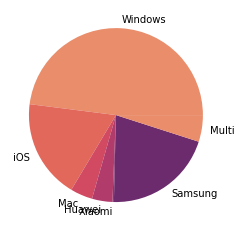

In [27]:
plt.rcParams['figure.figsize'] = (8, 70)
colors = sns.color_palette('flare')
plt.pie(fraud_dev_cat, labels=fraud_dev_cat.index.to_list(), colors=colors)
plt.show()

# TODO: Prettier

##### TODO: Categorize to 'Windows', 'Mac', 'Android', 'iOS', 'Multi'

In [28]:
fraud_dev_cat

Windows    3227
iOS        1240
Mac         278
Huawei      255
Xiaomi       18
Samsung    1373
Multi       333
dtype: int64

In [29]:
fraud_dev_new_cat = pd.Series({
    'Windows': 3227,
    'Mac': 278,
    'Android': (
        fraud_dev_cat.Huawei + 
        fraud_dev_cat.Xiaomi + 
        fraud_dev_cat.Samsung
    ),
    'iOS': 1240,
    'Multi': 333
})
fraud_dev_new_cat

Windows    3227
Mac         278
Android    1646
iOS        1240
Multi       333
dtype: int64

In [8]:
import plotly.express as px

In [30]:
fig = px.pie(
    values=fraud_dev_new_cat,
    names=fraud_dev_new_cat.index,
    title='Fruad Transactions Device Chunked Category'
)
fig.show()

### About Credit Card Companies

In [31]:
# Which Company has Most Damaged?

damaged_srs = fraud_full.groupby('card4').TransactionAmt.sum()
damaged_srs

card4
american express     42798.184
discover             20447.000
mastercard          336185.150
visa                604578.943
Name: TransactionAmt, dtype: float64

In [32]:
# Rates

trsc_amt = train_trsc.groupby('card4').TransactionAmt.sum()
trsc_amt

card4
american express    1.441220e+06
discover            1.767506e+06
mastercard          2.505001e+07
visa                5.123627e+07
Name: TransactionAmt, dtype: float64

In [33]:
damaged_rates = (damaged_srs / trsc_amt) * 100
damaged_rates

card4
american express    2.969581
discover            1.156828
mastercard          1.342056
visa                1.179982
Name: TransactionAmt, dtype: float64

In [34]:
import plotly.graph_objects as go

In [35]:
fig = go.Figure(go.Sunburst(
    labels=damaged_rates.index,
    parents=[
        '',
        'american express',
        'discover',
        'mastercard',
        'visa'
    ],
    values=damaged_rates
))
fig.update_layout(margin = {
    't': 0,
    'l': 0,
    'r': 0,
    'b': 0
})
fig.show()

## Data pre-processing for Modeling

## Feature engineering for Modeling

## Modeling

## Conclusion